[Dataset for Used cars price prediction (data.world)](https://data.world/johnitto/usedcarspriceprediction)

#Data Collection

In [ ]:
import pandas as pd


In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/train-data.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
dataset.shape

(6019, 14)

# Removing unnecessary columns

In [ ]:
# Removing the first column "Unnamed: 0" from dataset (which is not necessary just a number index)

dataset = dataset.drop(columns="Unnamed: 0")

dataset.head(4)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [ ]:
dataset.shape

(6019, 13)

# Removing duplicate records

In [ ]:
# Checking Duplicate Records from dataset

dataset.duplicated().sum()

0

In [ ]:
# if there are...
# Removing Duplicate Records from dataset

dataset = dataset.drop_duplicates()
dataset.shape

(6019, 13)

 Here is no duplicate data

# Handling inconsistent format

In [ ]:
dataset.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [ ]:
# preprocessing the columns values before Null values handling

 Removing the units from columns (eg. column "Mileage" contains value "25.44 kmpl" or "26.6 km/kg")

"25.44 kmpl"  -->  "25.44"

In [ ]:
dataset['Mileage'] = dataset['Mileage'].str.split().str[0]
dataset['Engine'] = dataset['Engine'].str.split().str[0]
dataset['Power'] = dataset['Power'].str.split().str[0]

dataset.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50



Converting object columns to numeric

"25.44"  --->  25.44


In [ ]:
print(type(dataset["Mileage"][0]))

<class 'str'>


In [ ]:
# Convert the column from object to float64

dataset['Mileage'] = pd.to_numeric(dataset['Mileage'], errors='coerce')
dataset['Engine'] = pd.to_numeric(dataset['Engine'], errors='coerce')
dataset['Power'] = pd.to_numeric(dataset['Power'], errors='coerce')

dataset.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50


Consistancy handelling values in "Seats" column

In [ ]:
dataset.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Here we can see "Seats" column has 0 as minimum value, which is not naturally acceptable.

So, 0 values should be replaced by mean value in "Seat" column

In [ ]:
dataset.loc[dataset["Seats"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0


In [ ]:
# Calculate the median of non-zero values in the 'Seats' column
median_seats = dataset.loc[dataset['Seats'] != 0, 'Seats'].mode()

# Replace 0 values with the median
dataset.loc[ dataset['Seats'] == 0, 'Seats' ] = median_seats

In [ ]:
dataset.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5976.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.806019,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


#Handelling Outliers

For column "Kilometers_Driven"

<Axes: ylabel='Kilometers_Driven'>

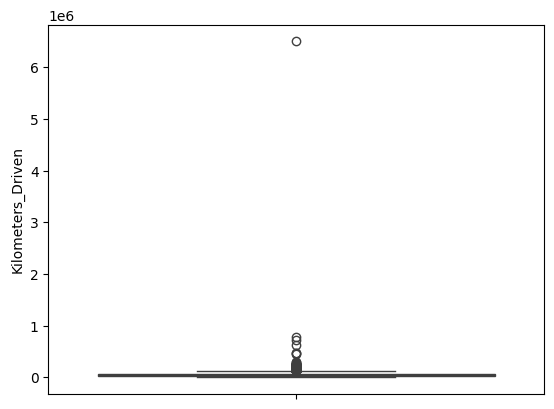

In [ ]:
import seaborn as sns

sns.boxplot(dataset['Kilometers_Driven'])

In [ ]:
import numpy as np

def detect_outliers_zscore(data):
  outliers = []

  thres = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean) / std

    if np.abs(z_score) >= thres:
      outliers.append(i)

  return outliers

In [ ]:
sample_outliers_km_driven = detect_outliers_zscore(dataset["Kilometers_Driven"])
print("Outliers from Z-scores method:", sample_outliers_km_driven)

Outliers from Z-scores method: [775000, 620000, 720000, 6500000, 480000, 480000, 445000]


In [ ]:
dataset.loc[dataset['Kilometers_Driven'] >= 445000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45


In [ ]:
# Deleting records which contains higher than 445000 kilometers
dataset = dataset.loc[dataset['Kilometers_Driven'] < 445000]

dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


For column "Mileage"

<Axes: ylabel='Mileage'>

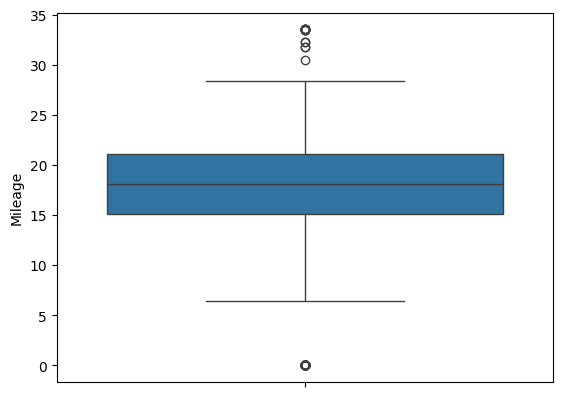

In [ ]:
import seaborn as sns

sns.boxplot(dataset['Mileage'])

In [ ]:
sample_outliers_mileage = detect_outliers_zscore(dataset["Mileage"])
print("Outliers from Z-scores method:", sample_outliers_mileage)

Outliers from Z-scores method: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.44, 0.0, 0.0, 33.54, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.54, 0.0, 0.0, 0.0, 0.0, 33.54, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.26, 33.54, 0.0, 0.0, 0.0, 0.0, 0.0, 33.44, 0.0, 33.44, 33.54, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.44, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.26, 0.0, 0.0, 0.0]


In [ ]:
print(min(sample_outliers_mileage))
print(max(sample_outliers_mileage))

0.0
33.54


In [ ]:
dataset.loc[(dataset['Mileage'] >= 32)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.50
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54 Lakh,2.96
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58 Lakh,3.05
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54 Lakh,3.90
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998.0,58.20,4.0,4.66 Lakh,4.00
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35 Lakh,3.25
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,NaN,2.10
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58 Lakh,2.85
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.70


In [ ]:
dataset.loc[(dataset['Mileage'] <= 0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39


In [ ]:
# Deleting records which contains higher than
dataset = dataset.loc[dataset['Mileage'] < 32]
dataset = dataset.loc[dataset['Mileage'] > 0]
dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


For column "Engine"

<Axes: ylabel='Engine'>

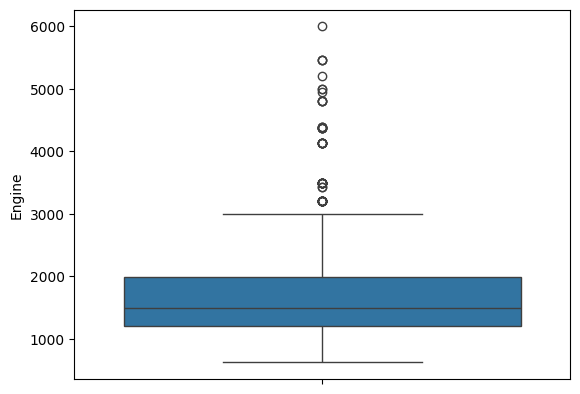

In [ ]:
import seaborn as sns

sns.boxplot(dataset['Engine'])

In [ ]:
sample_outliers_Engine = detect_outliers_zscore(dataset["Engine"])
print("Outliers from Z-scores method:", sample_outliers_Engine)

Outliers from Z-scores method: [4806.0, 5461.0, 4134.0, 4134.0, 3498.0, 3498.0, 3498.0, 3436.0, 4367.0, 4134.0, 4367.0, 4134.0, 3498.0, 4806.0, 3436.0, 4806.0, 3498.0, 4367.0, 4395.0, 3498.0, 3498.0, 3498.0, 3498.0, 4134.0, 4951.0, 4134.0, 4395.0, 5461.0, 5461.0, 4395.0, 4367.0, 4134.0, 5000.0, 4134.0, 3498.0, 4367.0, 5998.0, 4806.0, 3498.0, 5204.0, 3498.0, 5000.0]


In [ ]:
print(min(sample_outliers_Engine))
print(max(sample_outliers_Engine))
print(len(sample_outliers_Engine))

3436.0
5998.0
42


In [ ]:
dataset.loc[(dataset['Engine'] >= 3436)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,NaN,14.50
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,NaN,30.00
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,NaN,48.91
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,NaN,29.77
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.90,5.0,NaN,19.00
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,NaN,55.54
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,NaN,55.00
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436.0,NaN,2.0,NaN,40.00
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.00,7.0,NaN,67.00
1093,Audi Q7 4.2 TDI Quattro Technology,Bangalore,2014,50000,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,NaN,51.00


In [ ]:
# Deleting records which contains higher than
dataset = dataset.loc[dataset['Engine'] < 3436]
dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


# Feature formatting

> Original column "Name" contains values like ----------> **"Honda Jazz V"**
>
> Making new column "Company" that will contain ----> **"Honda"**
>
> Making new column "Model" that will contain ---------> **"Jazz V"**

In [ ]:
# Extracting the company name and creating a new column "Company"
dataset['Company'] = dataset['Name'].str.split().str[0]

# Extracting the remaining words and creating a new column "Model"
dataset['Model'] = dataset['Name'].str.split(n=1).str[1]

# droping Original column "Name"
dataset = dataset.drop(columns=["Name"])

<ipython-input-33-ece80c14158d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Company'] = dataset['Name'].str.split().str[0]
<ipython-input-33-ece80c14158d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Model'] = dataset['Name'].str.split(n=1).str[1]


In [ ]:
# Reordering the columns
new_order = ['Company', 'Model'] + [col for col in dataset.columns if col not in ['Company', 'Model']]
dataset = dataset[new_order]
dataset.head(3)

# now columns are again 14

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50


In [ ]:
dataset.shape

(5864, 14)

# Handelling Null values

### Removing unnecessary columns

In [ ]:
dataset.isnull().sum()

Company                 0
Model                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  77
Seats                   6
New_Price            5052
Price                   0
dtype: int64

In [ ]:
# Removing the column "New_Price" from dataset (which contains 5195 Null values)

dataset = dataset.drop(columns="New_Price")

dataset.head(2)

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50


In [ ]:
dataset.shape

(5864, 13)

Replacing the null values with mean value

In [ ]:
dataset['Engine'].fillna(dataset['Engine'].mean(), inplace=True)
dataset['Power'].fillna(dataset['Power'].mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

Company              0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

Now replacing Null values in "Seat" column

In [ ]:
# Replacing null values in the 'Seats' column with the median value

dataset['Seats'].fillna(dataset['Seats'].mode(), inplace=True)

In [ ]:
dataset.isnull().sum()

Company              0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

Now there are no null values in dataset

#Standardization

In [ ]:
def z_score_normalization(column):

  mean = sum(column) / len(column)

  variance = sum((x - mean) ** 2 for x in column) / len(column)
  std_dev = variance ** 0.5

  standardized_column = [(x - mean) / std_dev for x in column]

  return standardized_column


In [ ]:
dataset['Mileage'] = z_score_normalization(dataset["Mileage"])
dataset['Engine'] = z_score_normalization(dataset["Engine"])
dataset['Power'] = z_score_normalization(dataset["Power"])

In [ ]:
dataset

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,2.008191,-1.090560,-1.091298,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,0.315669,-0.036875,0.301443,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,-0.043351,-0.727905,-0.466161,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,0.584323,-0.639496,-0.464933,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,-0.776044,0.659567,0.600297,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,2.447806,-0.639496,-0.767062,5.0,4.75
6015,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,1.470882,-0.870441,-0.828470,5.0,4.00
6016,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,-1.069121,1.615822,0.010777,8.0,2.90
6017,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,0.127611,-1.090560,-0.908301,5.0,2.65




---
 # EDA (Exploratory Data Analysis)


---


## Distribution of cars by Year

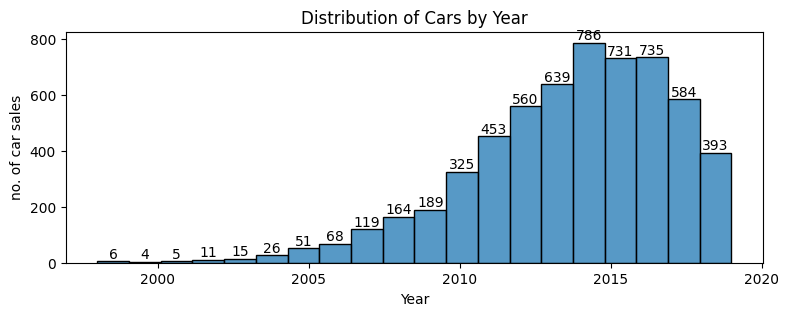

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 3))
ax = sns.histplot(data=dataset, x='Year', bins=20)
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('no. of car sales')
# plt.grid(color='black', linewidth=0.9, axis='y')

# assigning each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.show()

In [ ]:
print(dataset["Location"].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


## Distribution of cars by Location

Text(0, 0.5, 'No. of Cars')

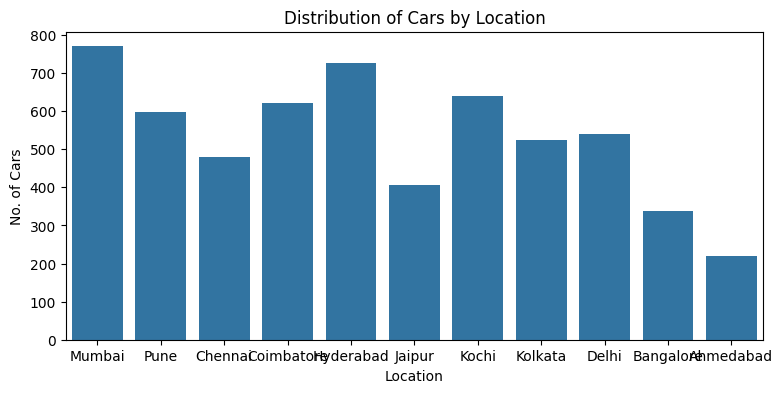

In [ ]:
# Distribution of cars by location
plt.figure(figsize=(9, 4))                        #Count Plot
sns.countplot(data=dataset, x='Location')
plt.title('Distribution of Cars by Location')
plt.xlabel('Location')
plt.ylabel('No. of Cars')


### Highest used cars were perchased in these Cities :

>  **Mumbai**
>
>  **Hyderabad**
>
>  **Kochi**
>
>  **Coimbatore**
>
>  **Pune**

### Distribution of cars by Fuel type

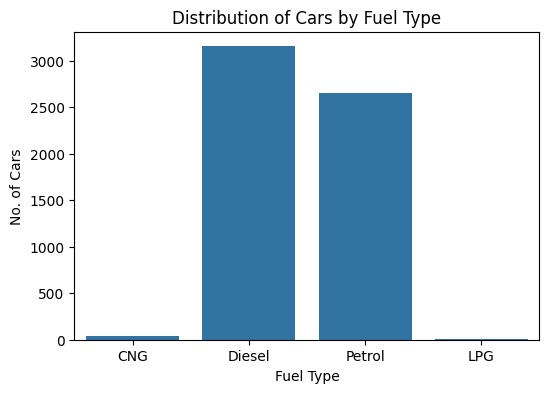

In [ ]:
# Distribution of cars by fuel type
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Fuel_Type')                            #COUNT PLOT
plt.title('Distribution of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('No. of Cars')
plt.show()

> **Diesel** or **Petrol** Cars are mostly purchased by people

## Distribution of cars by transmission

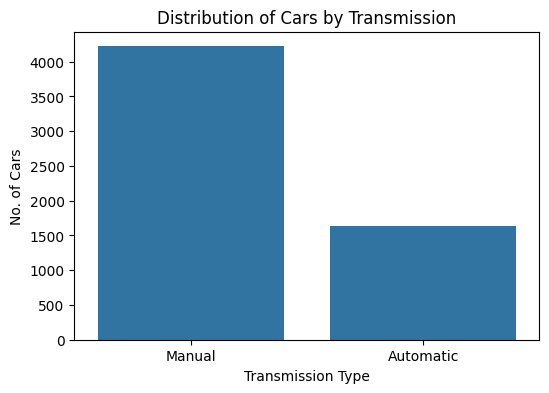

In [ ]:
# Distribution of cars by transmission
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Transmission')                            #COUNT PLOT
plt.title('Distribution of Cars by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('No. of Cars')
plt.show()

>  Manual Cars are mostly purchased by people

##Counting no. of Cars by their Seat no.

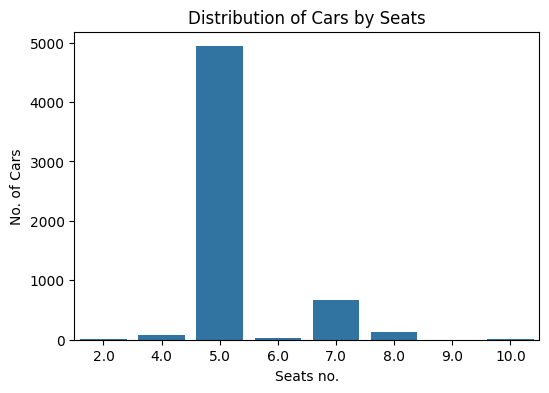

In [ ]:
# Distribution of cars by fuel type
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Seats')                            #COUNT PLOT
plt.title('Distribution of Cars by Seats')
plt.xlabel('Seats no.')
plt.ylabel('No. of Cars')
plt.show()

In [ ]:
print(dataset.Seats.value_counts())

Seats
5.0     4936
7.0      661
8.0      133
4.0       85
6.0       29
2.0        7
10.0       4
9.0        3
Name: count, dtype: int64


>>>There is a huge quentity for **5 Seater** cars



##From the graphical representation of data:
## we can estimate people behaviour means what type of car they want.

>Here, Among the best selling cars, most people liked **Maruti, Hyundai and Honda** cars more, which has transmission type is **Manual** , Fuel type is **Diesel or petrol** with **5 seater** cars.




---



---



---
# Some columns need to covert from categorial data --> numeric data (to do ML task)


>In a car price dataset with categorical features, converting them to  numeric representations is necessary for regression tasks because regression models, like linear regression, operate on numerical input. Numeric encoding allows the algorithm to perform mathematical computations, estimate coefficients, and make predictions based on the relationships between features and the target variable, enhancing the model's accuracy and interpretability.

>Here, Company, Model, Name, Location, Fuel_Type, Transmission, Owner_type

---

---

In [ ]:
#1) Finding unique values in the "Company" column
distinct_Company= dataset['Company'].unique()

print(len(distinct_Company))
print(distinct_Company)

28
['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', ..., 'Porsche', 'Ambassador', 'Isuzu', 'ISUZU', 'Force']
Length: 28
Categories (28, object): ['Ambassador', 'Audi', 'BMW', 'Chevrolet', ..., 'Tata', 'Toyota', 'Volkswagen',
                          'Volvo']


In [ ]:
#2) Finding unique values in the "Model" column
distinct_Model= dataset['Model'].unique()

print(len(distinct_Model))
print(distinct_Model)

1796
['Wagon R LXI CNG' 'Creta 1.6 CRDi SX Option' 'Jazz V' ...
 'Polo IPL II 1.2 Petrol Highline' 'Bolt Revotron XT' 'Xylo D4 BSIV']


In [ ]:
#3) Finding unique values in the "Location" column
distinct_Location= dataset['Location'].unique()

print(len(distinct_Location))
print(distinct_Location)

11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [ ]:
#5) Finding unique values in the "Fuel_Type" column
distinct_Fuel_type = dataset['Fuel_Type'].unique()

print(len(distinct_Fuel_type))
print(distinct_Fuel_type)

4
['CNG' 'Diesel' 'Petrol' 'LPG']


In [ ]:
#6) Finding unique values in the "Transmission" column
distinct_Transmission = dataset['Transmission'].unique()

print(len(distinct_Transmission))
print(distinct_Transmission)

2
['Manual' 'Automatic']


In [ ]:
#7) Finding unique values in the "Owner_Type" column
distinct_Owner_Type= dataset['Owner_Type'].unique()

print(len(distinct_Owner_Type))
print(distinct_Owner_Type)

4
['First' 'Second' 'Fourth & Above' 'Third']


## with LabelEncoder


>>`from sklearn.preprocessing import LabelEncoder`
>
>Initialize LabelEncoder
>
>>`label_encoder = LabelEncoder()`
>
>Fit label encoder and transform "transmission" column
>
>>`data['transmission_enc'] = label_encoder.fit_transform(data['transmission'])`
>
>it creates one column and has values that converts "manual" to 0 and "automatic" to 1
>after that we will delete the original categorical column "transmission"


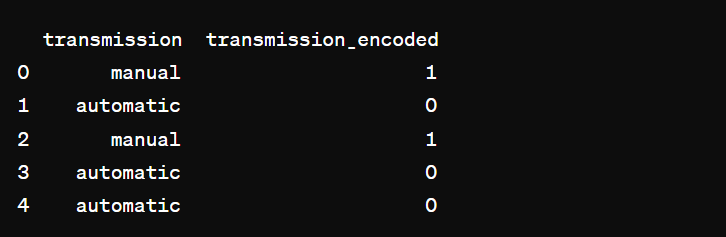

In [ ]:
dataset.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,2.008191,-1.090560,-1.091298,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,0.315669,-0.036875,0.301443,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,-0.043351,-0.727905,-0.466161,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,0.584323,-0.639496,-0.464933,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,-0.776044,0.659567,0.600297,5.0,17.74


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# making copy of dataset
dataset = dataset.copy()

# Initializing the label encoder
from sklearn.preprocessing import LabelEncoder

# Initialize a single label encoder
label_encoder = LabelEncoder()

# Encode multiple columns
columns_to_encode = ["Company", "Model", "Location", "Fuel_Type", "Transmission", "Owner_Type"]

for column in columns_to_encode:
    dataset[column] = label_encoder.fit_transform(dataset[column])



In [ ]:
dataset.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,16,1565,9,2010,72000,0,1,0,2.008191,-1.090560,-1.091298,5.0,1.75
1,9,441,10,2015,41000,1,1,0,0.315669,-0.036875,0.301443,5.0,12.50
2,8,886,2,2011,46000,3,1,0,-0.043351,-0.727905,-0.466161,5.0,4.50
3,16,599,2,2012,87000,1,1,0,0.584323,-0.639496,-0.464933,7.0,6.00
4,1,92,3,2013,40670,1,0,2,-0.776044,0.659567,0.600297,5.0,17.74


In [ ]:
# Now dataset is nearly ready to meet with model.

# here "Year" column can be replaced by "CAR_YEAR" --> "CURRENT_YEAR" - "CAR_YEAR"
# also we can do normalization or standardization on "Kilometers_Driven" column based on its distribution

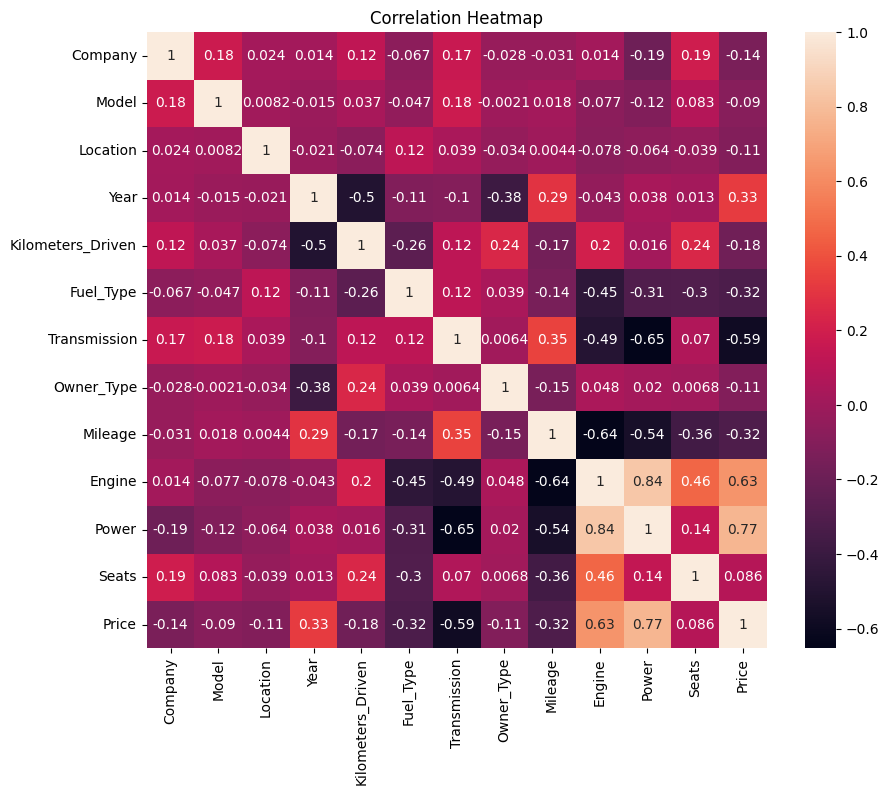

In [ ]:
# Feature Selection with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = dataset.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# IN GENRAL PROBLEMS

# 1) what if user gives a rocord where car company is unknown

# 2) It is easy to plot ( one_feature vs ouput_label ), but how can we plot ( f1, f2, f3... vs output_label )

"""

problem : string values are in column, preprocess it before feeding it to ml model

Label Encoding:

giving each unique catigorical value a number.
example:
['a','b','a','c','b','c'] ---> [0,1,0,2,1,2]

One Hot Encoding

But instead of "Label Encoding" , we can do this thing...
if we have column --> 'Transmission' that contains ['Manual' 'Automatic'] values in column,
then we can create another 2 columns ==> "isManual" and "isautomatic" which contains 0 and 1 (numeric values)
that indicates, it has that type of transmission.

1) if we have smaller no. of "string" classes in column , then columns splitting is good option.
---> because it doesnt increase data dimensionality for further errorless compatibility.

2) if we have larger no. of "string" classes in column , then label encoding is good option.
---> because if there is 1000 unique values in single column then it increases data dimensionality


"""


In [ ]:
"""
In our 'Dataset' , it has some problems

1) which columns are 'needed' or 'not needed' or 'needed to change':
      1) delete first column "Unnamed: 0   "
      2) "Name" is needed to create two more columns ("Company" and "model")
      3) In the last, object column should converted to nume


2) why "Company" and "Model" is derived from "name"
   --> because Company also gives a kind of impact on price of car.

3) which regression is suited for our dataset
   --> try all models to it. and then evaluate those models.

4) empty 'seat number' ---> with what value we replace it
                  median or mode or mean

  --> first we can eliminate 'mean' because there should be integer always.
  then between 'median' and 'mode' , 'mode' is more preferable.

5) Do you know luxury cars have less or equal seats then usual cars. may be 2 or sometimes 4
also some other factors are there, which are responsible for it. (mainly "Price", "Engine","Mileage", )

  --> So we can make a separate model that can predict the seats by car's other features(including price).



"""

In [ ]:
# These are the models for solutions of regression task

* Linear Regression:
> Assumes a linear relationship between the features and the target variable, making it simple and interpretable.

* Ridge Regression (L2 Regularization):
> Adds a regularization term to linear regression to prevent overfitting, useful when dealing with multicollinearity.

* Lasso Regression (L1 Regularization):
> Similar to Ridge, but uses L1 regularization, often leading to sparse feature selection.

* Elastic Net Regression:
> Combines both L2 and L1 regularization, providing a balance between Ridge and Lasso.

* Decision Tree Regression:
> Utilizes a decision tree structure to capture non-linear relationships in the data.

* Random Forest Regression:
> An ensemble of decision trees, combining their predictions to improve accuracy and reduce overfitting.

* Gradient Boosting Regression (e.g., XGBoost, LightGBM):
> Builds multiple weak models sequentially, each correcting errors of the previous one.

* Support Vector Regression (SVR):
> Extends support vector machines to regression tasks, handling non-linear relationships.

* K-Nearest Neighbors (KNN) Regression:
> Predicts the target variable based on the average or weighted average of its k nearest neighbors in the feature space.

* Neural Network Regression:
> Utilizes deep learning models with multiple layers of interconnected neurons to capture complex patterns in the data.




